In [1]:
import season_streaks
import streak_converter

import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import pandas as pd

In [2]:
from qbstyles import mpl_style

mpl_style(dark=True)

edit

In [3]:
all_player_games = season_streaks.get_all_player_games()

In [112]:
all_shots = season_streaks.get_all_shots()

In [4]:
#all_player_games.loc[all_player_games.exact_percentile_rank < .05][:10]

In [96]:
all_player_games.sort_values("z_from_percentile_rank", ascending=True)

,,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,z_score,season,ww_percentile,exact_percentile_rank,z_from_percentile_rank
player_id,game_id,,,,,,,,,,,,
1626224,22100393,Cedi Osman,6,10,2,LLLLLLLLLLWWWWWW,8.5,3.25,-3.605551,2022,0.015575,0.012488,-3.662516
101235,20801046,Kelenna Azubuike,7,8,2,WWWWWWWLLLLLLLL,8.466667,3.448889,-3.482097,2009,0.024875,0.01554,-3.606128
2584,21001184,Willie Green,12,5,2,LLLLLWWWWWWWWWWWW,8.058824,2.67301,-3.705851,2011,0.010534,0.01616,-3.595953
2225,20400986,Tony Parker,6,9,2,LLLLLLLLLWWWWWW,8.2,3.188571,-3.472111,2005,0.025819,0.01998,-3.540348
2202,20601003,Jason Richardson,9,9,3,LLLLLLLWWWWWWWWWLL,10.0,4.235294,-3.401389,2007,0.033522,0.020568,-3.532691
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,21400793,Kevin Martin,9,10,18,LLWLWLWLWLWLWLWLWLW,10.473684,4.459834,3.56388,2015,99.981729,99.989175,3.698940
2544,20500058,LeBron James,10,8,17,WWLWLWLWLWLWLWLWLW,9.888889,4.124909,3.501308,2006,99.976851,99.989716,3.711940
1627749,22301147,Dejounte Murray,12,19,25,LWLWLWLWLWLWLLWLLLWLWLWLWLWLLLL,15.709677,6.722164,3.583243,2024,99.983032,99.993423,3.823544


In [97]:
all_player_games.sort_values("z_score", ascending=True)

player_name makes misses total_streaks  \
player_id game_id                                                  
2547      20600674         Chris Bosh    15      4             2   
2738      20700225     Andre Iguodala     3     16             2   
2584      21001184       Willie Green    12      5             2   
203992    22100478  Bogdan Bogdanovic     4     13             2   
1626224   22100393         Cedi Osman     6     10             2   
...                               ...   ...    ...           ...   
1641998   22300687       Trey Jemison     2      0             1   
          22300737       Trey Jemison     0      4             1   
          22300989       Trey Jemison     0      1             1   
1642013   22301108     Malik Williams     0      7             1   
          22301176     Malik Williams     0      2             1   

                               raw_data expected_streaks  variance   z_score  \
player_id game_id                                                              
2547      20600674  WWWWWWWWWWWWWWWLLLL         7.315789  1.865189   -3.8923   
2738      20700225  LLLLLLLLLLLLLLLLWWW         6.052632  1.137581 -3.799671   
2584      21001184    LLLLLWWWWWWWWWWWW         8.058824   2.67301 -3.705851   
203992    22100478    WWWWLLLLLLLLLLLLL         7.117647  1.956747 -3.658499   
1626224   22100393     LLLLLLLLLLWWWWWW              8.5      3.25 -3.605551   
...                                 ...              ...       ...       ...   
1641998   22300687                   WW              1.0       NaN       NaN   
          22300737                 LLLL              1.0       NaN       NaN   
          22300989                    L              1.0       NaN       NaN   
1642013   22301108              LLLLLLL              1.0       NaN       NaN   
          22301176                   LL              1.0       NaN       NaN   

                   season  ww_percentile exact_percentile_rank  \
player_id game_id                                                
2547      20600674   2007       0.004965                0.0258   
2738      20700225   2008       0.007244              0.103199   
2584      21001184   2011       0.010534               0.01616   
203992    22100478   2022       0.012685              0.042017   
1626224   22100393   2022       0.015575              0.012488   
...                   ...            ...                   ...   
1641998   22300687   2024            NaN                  50.0   
          22300737   2024            NaN                  50.0   
          22300989   2024            NaN                  50.0   
1642013   22301108   2024            NaN                  50.0   
          22301176   2024            NaN                  50.0   

                    z_from_percentile_rank  
player_id game_id                           
2547      20600674               -3.472312  
2738      20700225               -3.080868  
2584      21001184               -3.595953  
203992    22100478               -3.339155  
1626224   22100393               -3.662516  
...                                    ...  
1641998   22300687                0.000000  
          22300737                0.000000  
          22300989                0.000000  
1642013   22301108                0.000000  
          22301176                0.000000  

[498226 rows x 12 columns]

I think this looks better for the blog.

In [106]:
all_player_games['display'] = all_player_games.raw_data.str.replace("W", "1").str.replace("L", "0")

In [107]:
all_player_games.sort_values("z_score", ascending=False)

player_name makes misses total_streaks  \
player_id game_id                                                 
1888      20500510  Richard Hamilton    10     13            21   
202681    21200001      Kyrie Irving    11      9            19   
1627749   22301147   Dejounte Murray    12     19            25   
2755      21400793      Kevin Martin     9     10            18   
2544      20500058      LeBron James    10      8            17   
...                              ...   ...    ...           ...   
1641998   22300687      Trey Jemison     2      0             1   
          22300737      Trey Jemison     0      4             1   
          22300989      Trey Jemison     0      1             1   
1642013   22301108    Malik Williams     0      7             1   
          22301176    Malik Williams     0      2             1   

                                           raw_data expected_streaks  \
player_id game_id                                                      
1888      20500510          LWLLWLWLWLWLWLLWLWLWLWL        12.304348   
202681    21200001             WLWLWLWLWWLWLWLWLWLW             10.9   
1627749   22301147  LWLWLWLWLWLWLLWLLLWLWLWLWLWLLLL        15.709677   
2755      21400793              LLWLWLWLWLWLWLWLWLW        10.473684   
2544      20500058               WWLWLWLWLWLWLWLWLW         9.888889   
...                                             ...              ...   
1641998   22300687                               WW              1.0   
          22300737                             LLLL              1.0   
          22300989                                L              1.0   
1642013   22301108                          LLLLLLL              1.0   
          22301176                               LL              1.0   

                    variance   z_score season  ww_percentile  \
player_id game_id                                              
1888      20500510  5.294724  3.779031   2006      99.992128   
202681    21200001  4.637368  3.761397   2013      99.991552   
1627749   22301147  6.722164  3.583243   2024      99.983032   
2755      21400793  4.459834   3.56388   2015      99.981729   
2544      20500058  4.124909  3.501308   2006      99.976851   
...                      ...       ...    ...            ...   
1641998   22300687       NaN       NaN   2024            NaN   
          22300737       NaN       NaN   2024            NaN   
          22300989       NaN       NaN   2024            NaN   
1642013   22301108       NaN       NaN   2024            NaN   
          22301176       NaN       NaN   2024            NaN   

                   exact_percentile_rank  z_from_percentile_rank  \
player_id game_id                                                  
1888      20500510             99.997116                4.022070   
202681    21200001             99.997023                4.014634   
1627749   22301147             99.993423                3.823544   
2755      21400793             99.989175                3.698940   
2544      20500058             99.989716                3.711940   
...                                  ...                     ...   
1641998   22300687                  50.0                0.000000   
          22300737                  50.0                0.000000   
          22300989                  50.0                0.000000   
1642013   22301108                  50.0                0.000000   
          22301176                  50.0                0.000000   

                                            display  
player_id game_id                                    
1888      20500510          01001010101010010101010  
202681    21200001             10101010110101010101  
1627749   22301147  0101010101010010001010101010000  
2755      21400793              0010101010101010101  
2544      20500058               110101010101010101  
...                                             ...  
1641998   22300687                               11  
          22

In [108]:
all_player_games.sort_values("z_from_percentile_rank", ascending=False)

,,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,z_score,season,ww_percentile,exact_percentile_rank,z_from_percentile_rank,display
player_id,game_id,,,,,,,,,,,,,
1888,20500510,Richard Hamilton,10,13,21,LWLLWLWLWLWLWLLWLWLWLWL,12.304348,5.294724,3.779031,2006,99.992128,99.997116,4.022070,01001010101010010101010
202681,21200001,Kyrie Irving,11,9,19,WLWLWLWLWWLWLWLWLWLW,10.9,4.637368,3.761397,2013,99.991552,99.997023,4.014634,10101010110101010101
1627749,22301147,Dejounte Murray,12,19,25,LWLWLWLWLWLWLLWLLLWLWLWLWLWLLLL,15.709677,6.722164,3.583243,2024,99.983032,99.993423,3.823544,0101010101010010001010101010000
2544,20500058,LeBron James,10,8,17,WWLWLWLWLWLWLWLWLW,9.888889,4.124909,3.501308,2006,99.976851,99.989716,3.711940,110101010101010101
2755,21400793,Kevin Martin,9,10,18,LLWLWLWLWLWLWLWLWLW,10.473684,4.459834,3.56388,2015,99.981729,99.989175,3.698940,0010101010101010101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,20601003,Jason Richardson,9,9,3,LLLLLLLWWWWWWWWWLL,10.0,4.235294,-3.401389,2007,0.033522,0.020568,-3.532691,000000011111111100
2225,20400986,Tony Parker,6,9,2,LLLLLLLLLWWWWWW,8.2,3.188571,-3.472111,2005,0.025819,0.01998,-3.540348,000000000111111
2584,21001184,Willie Green,12,5,2,LLLLLWWWWWWWWWWWW,8.058824,2.67301,-3.705851,2011,0.010534,0.01616,-3.595953,00000111111111111


In [114]:
all_shots[all_shots.GAME_ID == 20500058]
#[:,20500058]

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SORTABLE_DATE
396285,2006,2005-06,1610612760,Seattle SuperSonics,2557,Luke Ridnour,G,PG,11-09-2005,20500058,...,Left Side Center,LC,16-24 ft.,12.2,23.65,22,1,11,44,2005-11-09
396302,2006,2005-06,1610612739,Cleveland Cavaliers,727,Eric Snow,G,PG,11-09-2005,20500058,...,Center,C,Less Than 8 ft.,-1.8,6.05,1,1,11,15,2005-11-09
396312,2006,2005-06,1610612760,Seattle SuperSonics,951,Ray Allen,G,SG,11-09-2005,20500058,...,Left Side Center,LC,24+ ft.,13.5,26.95,25,1,11,4,2005-11-09
396319,2006,2005-06,1610612739,Cleveland Cavaliers,2544,LeBron James,F,SF,11-09-2005,20500058,...,Center,C,Less Than 8 ft.,-2.3,5.75,2,1,10,53,2005-11-09
396336,2006,2005-06,1610612760,Seattle SuperSonics,951,Ray Allen,G,SG,11-09-2005,20500058,...,Center,C,Less Than 8 ft.,6.2,5.25,6,1,10,27,2005-11-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398094,2006,2005-06,1610612760,Seattle SuperSonics,2863,Damien Wilkins,F,SF,11-09-2005,20500058,...,Right Side Center,RC,16-24 ft.,-13.1,17.45,17,4,1,2,2005-11-09
398112,2006,2005-06,1610612739,Cleveland Cavaliers,2366,Mike Wilks,G,PG,11-09-2005,20500058,...,Center,C,Less Than 8 ft.,-0.1,5.45,0,4,0,39,2005-11-09
398116,2006,2005-06,1610612760,Seattle SuperSonics,2043,Mateen Cleaves,G,PG,11-09-2005,20500058,...,Right Side Center,RC,16-24 ft.,-11.3,18.05,17,4,0,30,2005-11-09
398130,2006,2005-06,1610612739,Cleveland Cavaliers,1985,Zendon Hamilton,C,C,11-09-2005,20500058,...,Center,C,Less Than 8 ft.,-0.8,8.35,3,4,0,14,2005-11-09


In [6]:
all_player_games[(all_player_games.makes > 10) | (all_player_games.misses > 10)].z_from_percentile_rank.describe()

count    39982.000000
mean         0.069040
std          0.953896
min         -3.595953
25%         -0.585421
50%          0.055119
75%          0.707621
max          4.022070
Name: z_from_percentile_rank, dtype: float64

In [7]:
all_player_games.z_score.astype("float").describe()

count    409247.000000
mean          0.039485
std           0.995995
min          -3.892300
25%          -0.707107
50%           0.054708
75%           0.816497
max           3.779031
Name: z_score, dtype: float64

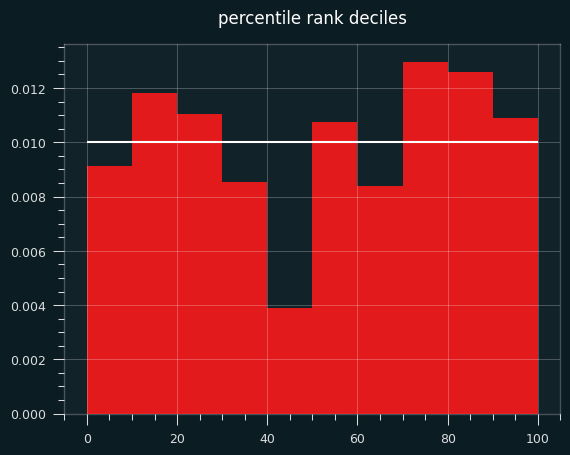

In [8]:
_out = plt.hist(all_player_games.ww_percentile, density=True) # FIXME
_out = plt.hlines(.010, 0 ,100, colors="white")
_out = plt.title("percentile rank deciles")

at one point I had pecentile rank calculations for the player career streaks, but it was painfully slow, and not really that useful

In [9]:
all_players = season_streaks.get_all_player_streaks()

In [10]:
#all_players.to_pickle("slow_asf.pkl")

In [11]:
all_players.head()

,player_id,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score,ww_percentile
0,15,Eric Piatkowski,228,340,293,WLLLWLWWLLLLWWWLLWWLWLLWLLLLWLWWLWLLLLWWWLLLWL...,273.957746,130.922352,11.442131,1.664223,95.196603
1,43,Chris Whitney,17,28,20,WLLLLWLLLWWWLWWLWLLWLLWLLLWWLLLLWLLLLWWWWLLLL,22.155556,9.690954,3.113030,-0.692430,24.433363
2,56,Gary Payton,1195,1467,1311,WWWWWWLLLWLLLWWLWLLLLWWWLLLWWLLWLWLLLLWLLLWLLL...,1318.103681,651.426157,25.523051,-0.278324,39.038177
3,57,Doug Christie,461,602,561,LLLLWLWLWWWLWLLLWWWLLWLLWLWLWLWWLWLWWWWLWLLLWL...,523.148636,256.230743,16.007209,2.364645,99.097632
4,72,Kenny Anderson,198,259,224,WWWWLLWLLLWWWLLLWLLLLLLLLLLLWLLWLWWWWLWWLLLLWW...,225.428884,109.964682,10.486405,-0.136261,44.580763


In [12]:
all_players.z_score.describe()

count    2103.000000
mean        0.308491
std         1.129632
min        -3.977309
25%        -0.449784
50%         0.340279
75%         1.017736
max         5.897434
Name: z_score, dtype: float64

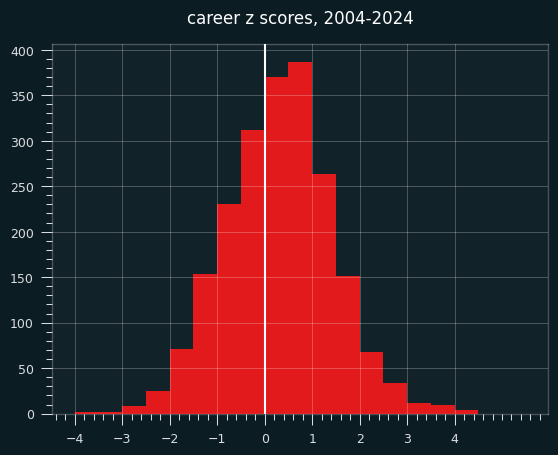

In [13]:
all_players.z_score.hist(bins=np.arange(-4,6,.5))
plt.title("career z scores, 2004-2024")
plt.xticks(range(-4,5))
_out = plt.axvline(0, color="white")

nobody will believe me that I spelled this guy's name right. His nickname was "the big Z". it seems a good research question to see if that was statistically true. It's not.

In [231]:
all_players[all_players.player_name=="Zydrunas Ilgauskas"]

,player_id,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score,ww_percentile
132,980,Zydrunas Ilgauskas,2874,3112,3047,LWLLLLWLWLWWWLLLWLLWLLWWLWWLWWWWLWWLWLLLLWLWWL...,2989.268627,1491.522325,38.620232,1.494848,93.252293


## The Lebron stuff starts here

In [14]:
max_player = all_players.loc[all_players.z_score.idxmax()]
max_player

player_id                                                        2544
player_name                                              LeBron James
makes                                                           14837
misses                                                          14474
total_streaks                                                   15159
raw_data            LWLWLWLWWWLWLWLWLWWWWLLWWLLWLWWLLWLLWLLLWWLLLL...
expected_streaks                                         14654.252226
variance                                                   7325.25239
sd                                                          85.587688
z_score                                                      5.897434
ww_percentile                                                   100.0
Name: 416, dtype: object

In [164]:
max_player.expected_streaks - max_player.total_streaks

np.float64(-504.7477738732905)

In [167]:
1/ (1 - scipy.stats.norm.cdf(max_player.z_score))

np.float64(541716136.7238543)

In [15]:
max_player.total_streaks - max_player.expected_streaks

np.float64(504.7477738732905)

In [181]:
1 - scipy.stats.norm.cdf(max_player.z_score)

np.float64(1.8459852535457344e-09)

we can calculate the exact odds as well. this will take a while...

In [183]:
import wald_wolfowitz
exact_lbj_percentile = wald_wolfowitz.get_percentile_rank(max_player.makes, max_player.misses, max_player.total_streaks)
exact_lbj_percentile

np.float64(99.99999981594522)

In [232]:
(1-(exact_lbj_percentile/100))

np.float64(1.8405478252603302e-09)

In [141]:
f"{1/1.84e-9:,}"

'543,478,260.8695652'

if there are 8.2 billion people, we'd expect 15 lebrons

In [191]:
8.2e9 * (1 - (exact_lbj_percentile/100))

np.float64(15.092492167134708)

In [142]:
max_player.makes + max_player.misses

np.int64(29311)

In [143]:
import seaborn as sns

this is it, the jon bois scatterplot (TM) 

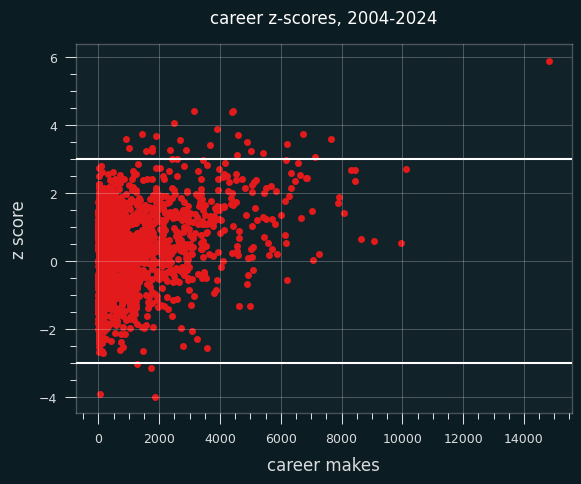

In [193]:
#sns.lmplot(all_players, x='makes', y='z_score')


plt.scatter(all_players['makes'], all_players['z_score'])
plt.xlabel("career makes")
plt.ylabel("z score")
plt.axhline(-3, color="white")
plt.axhline(+3, color="white")

_out = plt.title("career z-scores, 2004-2024")

I am going to simulate LeBron's career over and over again, and see what the streak lengths look like. this seems like more fun than working out exact probabilities.

In [17]:
NUM_LEBRONS = 1000
import numpy as np
import pandas as pd
rng = np.random.default_rng(2718)

fake_streaks = []
make_lengths = []
miss_lengths = []


for x in range(NUM_LEBRONS):
    # match the exact number of makes/misses as the player, then randomly shuffle the makes + misses
    fake_results = [1 for x in range(max_player.makes)] + [0 for x in range(max_player.misses)]
    rng.shuffle(fake_results)
    fake_streak_data = streak_converter.convert_to_streaks(pd.Series(fake_results), None, True)
    fake_streaks.append(fake_streak_data)
    make_lengths.append(fake_streak_data['make_lengths'])
    miss_lengths.append(fake_streak_data['miss_lengths'])

In [18]:
expected_makes = pd.concat(make_lengths, axis=1).fillna(0).mean(axis=1)
expected_misses = pd.concat(miss_lengths, axis=1).fillna(0).mean(axis=1)

In [19]:
expected_makes

1     3620.895
2     1831.921
3      925.741
4      470.578
5      237.399
6      119.710
7       60.753
8       30.626
9       15.664
10       7.915
12       2.057
11       3.963
13       1.033
15       0.270
14       0.498
16       0.115
23       0.004
17       0.066
18       0.032
21       0.003
19       0.019
20       0.011
22       0.003
dtype: float64

In [20]:
expected_misses

1     3711.329
2     1831.857
3      904.714
4      446.703
5      219.952
6      108.483
7       53.517
8       26.684
9       13.157
10       6.592
12       1.548
11       3.128
13       0.794
16       0.098
14       0.398
15       0.161
17       0.063
18       0.024
21       0.002
19       0.016
20       0.006
24       0.001
23       0.001
22       0.002
dtype: float64

In [21]:
lebron_streaks = streak_converter.convert_to_streaks(None, max_player.raw_data)

In [22]:
makes_diff = (lebron_streaks['make_lengths'] - expected_makes).dropna()
makes_percentage = 100 * (lebron_streaks['make_lengths'] / expected_makes).dropna()

makes_percentage

1     105.112134
2     107.864913
3      99.163805
4      99.452163
5      85.931280
6      88.547323
7      88.884500
8      68.569190
9      89.376915
10    101.073910
11     75.700227
12     48.614487
dtype: float64

In [23]:
makes_diff

1     185.105
2     144.079
3      -7.741
4      -2.578
5     -33.399
6     -13.710
7      -6.753
8      -9.626
9      -1.664
10      0.085
11     -0.963
12     -1.057
dtype: float64

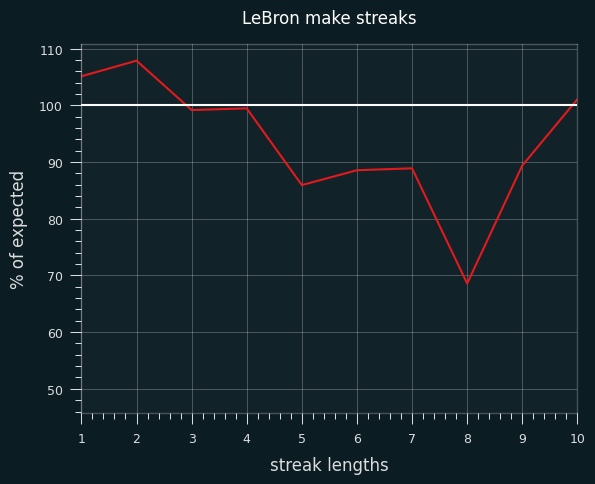

In [150]:
plt.plot(makes_percentage.index, makes_percentage.values)
plt.xlim(1,10)
plt.xlabel("streak lengths")
plt.ylabel('% of expected')
plt.axhline(100, color="white")
plt.xticks(range(1,11))
_out = plt.title("LeBron make streaks")

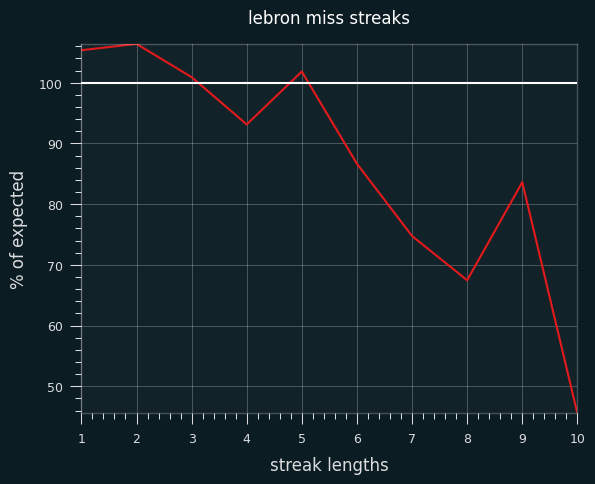

In [151]:
miss_percentage = 100 * (lebron_streaks['miss_lengths'] / expected_misses).dropna()

plt.plot(miss_percentage.index, miss_percentage.values)
plt.xlim(1,10)
plt.ylim(miss_percentage[:10].min(), miss_percentage[:10].max())
plt.xlabel("streak lengths")
plt.ylabel('% of expected')
plt.axhline(100, color="white")
plt.xticks(range(1,11))
_out = plt.title("lebron miss streaks")

In [26]:
all_player_games.head()

player_name makes misses total_streaks   raw_data  \
player_id game_id                                                           
15        20300191  Eric Piatkowski     1      2             2        WLL   
          20300206  Eric Piatkowski     3      3             5     LWLWWL   
          20300230  Eric Piatkowski     1      3             2       LLLW   
          20300250  Eric Piatkowski     5      4             6  WWLLWWLWL   
          20300264  Eric Piatkowski     1      5             3     LWLLLL   

                   expected_streaks  variance   z_score season  ww_percentile  \
player_id game_id                                                               
15        20300191         2.333333  0.222222 -0.707107   2004      23.975006   
          20300206              4.0       1.2  0.912871   2004      81.934479   
          20300230              2.5      0.25      -1.0   2004      15.865525   
          20300250         5.444444   1.91358   0.40161   2004      65.601434   
          20300264         2.666667  0.222222  0.707107   2004      76.024994   

                   exact_percentile_rank  z_from_percentile_rank  
player_id game_id                                                 
15        20300191             33.333333               -0.430727  
          20300206                  80.0                0.841621  
          20300230                  25.0               -0.674490  
          20300250             64.285714                0.366106  
          20300264             66.666667                0.430727

when I started working on this data, this game came up before I had `player_name`s filled in, and immediately knew who it was and what game it was just from the statline. Just an all time great chucking performance I'd recognize anywhere.

In [152]:
all_player_games.loc[all_player_games.expected_streaks.idxmax()]

player_name                                                     Kobe Bryant
makes                                                                    22
misses                                                                   28
total_streaks                                                            18
raw_data                  WWWWWLLLWLLWWLLLLWLWWWLLLLWLWWLLLLWWLLLLWWWWWL...
expected_streaks                                                      25.64
variance                                                          11.887543
z_score                                                           -2.215885
season                                                                 2016
ww_percentile                                                      1.334967
exact_percentile_rank                                              1.382158
z_from_percentile_rank                                            -2.202314
display                   1111100010011000010111000010110000110000111110...
Name: (977, 

In [153]:
all_player_games.loc[all_player_games.expected_streaks.idxmax()].display

'11111000100110000101110000101100001100001111100000'

In [28]:
excess_streaks = all_player_games[all_player_games.makes > 3].total_streaks - all_player_games[all_player_games.makes > 3].expected_streaks

In [29]:
sum(excess_streaks > 0) / len(excess_streaks)

0.5082873162677578

In [30]:
sum(excess_streaks < 0) / len(excess_streaks)

0.43760849911502925

this is another way of visualizing the fact that players are more unstreaky than expected. this isn't considering the variance at all, just the difference from expected.

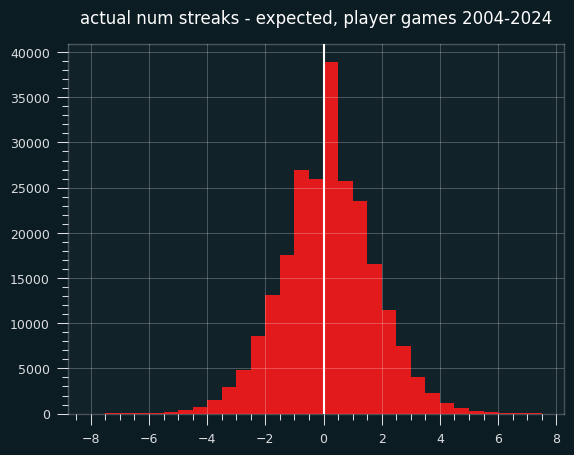

In [31]:
excess_streaks.hist(bins=np.arange(-8,8,.5))
plt.title("actual num streaks - expected, player games 2004-2024")
_out = plt.axvline(0, color="white")

In [32]:
sum(excess_streaks)

17692.942135961068

In [33]:
all_players.loc[all_players.z_score.idxmin()]

player_id                                                     1627826
player_name                                               Ivica Zubac
makes                                                            1865
misses                                                           1181
total_streaks                                                    1343
raw_data            WLWWLLLLWWLLLWWLWWWLWLLWWWLLWLLWLLLLWWWLLLLWWL...
expected_streaks                                          1447.201576
variance                                                   686.388439
sd                                                          26.199016
z_score                                                     -3.977309
ww_percentile                                                0.003485
Name: 1440, dtype: object

In [34]:
all_players.sort_values("z_score")[:10]

,player_id,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score,ww_percentile
1440,1627826,Ivica Zubac,1865,1181,1343,WLWWLLLLWWLLLWWLWWWLWLLWWWLLWLLWLLLLWWWLLLLWWL...,1447.201576,686.388439,26.199016,-3.977309,0.003485
1907,1630466,Gabriel Deck,40,41,24,LLLLWWLLLLLLLLWWWLLWWWWLWWWWWLLLLWLLWLLLLLLLWL...,41.493827,19.990703,4.471096,-3.912648,0.004564
1250,203939,Dwight Powell,1720,1135,1288,WWWLLLLWWWWWWLWLWLWWLLWLWLWLLLWLLWLLLLLLWLWWLW...,1368.565674,654.824214,25.589533,-3.148384,0.082088
944,202357,Nemanja Bjelica,1279,1467,1289,LWLLWWWWLLWLWLLLLWWLLLWWWLWWLLWWWWWLLLWWWLLWLL...,1367.564457,679.829454,26.073539,-3.013187,0.129260
1654,1629067,Isaac Bonga,156,205,153,LWLLWLLLLLLWLLLWLLLLLLLLWLLLLLLLLLWWWWLWLWLWLW...,178.174515,86.704540,9.311527,-2.703586,0.342978
2092,1631321,Sidy Cissoko,16,17,10,WWLWWLLLLWWWWLWWWWWWWLLLLLLLLWLLL,17.484848,7.977043,2.824366,-2.650099,0.402341
119,956,Erick Dampier,1476,1089,1189,LLWWWLWWLWWLLLLWWWLWLLWWWLLWLWLWLWLWWLLLLWLLLL...,1254.305263,612.137589,24.741414,-2.639512,0.415127
1091,203117,Doron Lamb,123,200,131,LLLWLLLWLWLLWLLLWWWLWLLWWLLLWLLLWLWLLLWWLWWLLW...,153.321981,71.582808,8.460662,-2.638326,0.416583
1822,1630174,Aaron Nesmith,717,868,735,WLLWLLLLWWWLLWLWLWLLLWLWLLLWWWLLWLWLWWLLWWLLLW...,786.307256,388.839759,19.719020,-2.601917,0.463521
1166,203497,Rudy Gobert,3562,1878,2375,WLLLLWWLWLWLLWWWWLWLLLWLWLLWWWWLWWLLLLLLWLWWWW...,2460.351471,1111.592260,33.340550,-2.559990,0.523376


In [35]:
all_players.sort_values("z_score", ascending=False)[:10]

,player_id,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score,ww_percentile
416,2544,LeBron James,14837,14474,15159,LWLWLWLWWWLWLWLWLWWWWLLWWLLWLWWLLWLLWLLLWWLLLL...,14654.252226,7325.252390,85.587688,5.897434,100.000000
1504,1628398,Kyle Kuzma,3133,3809,3622,WWWLLWLLWWLWWWWLWLLWWWWLWLWLLWLLWLLWWLLLWWLLWL...,3439.086142,1702.492182,41.261267,4.433064,99.999535
1253,203944,Julius Randle,4441,5004,4920,LWLWLLWWWLLLWLLLLLLWWLWWLLLWLLWWWWLWLLLWLLWLWL...,4706.720275,2344.250062,48.417456,4.405017,99.999471
229,1882,Elton Brand,4408,4347,4583,WWWWWWWLLLLLLWLWWWWLLWLLLLLLWLLLWLLLWWWLLLWLLL...,4378.287493,2188.287469,46.779135,4.376150,99.999396
1810,1630162,Anthony Edwards,2479,3076,2896,WLLLWWLLWLLWWLLWWLWWLWWWWWLLLLLLLWWWLWLLLLLLLW...,2746.419982,1356.605232,36.832122,4.061129,99.997558
1636,1629029,Luka Doncic,3898,4398,4311,LLLLLLWWLLLWWLWLWWLWLLLLWWWWWLLLWLLWLLLWWLWWWL...,4133.932498,2058.709837,45.373008,3.902485,99.995240
1176,203507,Giannis Antetokounmpo,6731,5615,6330,LLLWWWWLWLWLLLWLWLLLLWWWLWLLLWLWLWWLWWWLWLLWWL...,6123.560343,3036.016411,55.100058,3.746632,99.991039
1063,203089,John Henson,1438,1222,1418,LLLWLWWLLWWWLLLWLWWLLWLWWWWWLWLLWLWLWLWWWLLWWW...,1322.230075,656.008906,25.612671,3.739162,99.990768
823,201609,Goran Dragic,4605,5423,5166,WWLLLLWLLLWLWLLLWWWLWLWLLLWLLWLLLLWWLLLLLWWLWL...,4981.637216,2473.498199,49.734276,3.706956,99.989512
1761,1629673,Jordan Poole,1886,2612,2312,WLLLLLLLLWLLLLLLLWLLLLLLLLWLLWWWLLWLLWLLWLLLWL...,2191.409960,1066.423256,32.656137,3.692722,99.988907


this is me making my own ludicrous metric

In [36]:
#all_players['zspm'] = all_players['z_score'] / all_players['makes']

In [37]:
#all_players[all_players.makes > 100].sort_values('zspm')[:10]

In [38]:
len(all_players)

2162

both of these should be about 2.5%

In [39]:
sum(all_players.z_score < -2) / len(all_players)

0.017113783533765033

In [40]:
sum(all_players.z_score > 2) / len(all_players)

0.05920444033302498

In [41]:
all_players.head()

,player_id,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score,ww_percentile
0,15,Eric Piatkowski,228,340,293,WLLLWLWWLLLLWWWLLWWLWLLWLLLLWLWWLWLLLLWWWLLLWL...,273.957746,130.922352,11.442131,1.664223,95.196603
1,43,Chris Whitney,17,28,20,WLLLLWLLLWWWLWWLWLLWLLWLLLWWLLLLWLLLLWWWWLLLL,22.155556,9.690954,3.113030,-0.692430,24.433363
2,56,Gary Payton,1195,1467,1311,WWWWWWLLLWLLLWWLWLLLLWWWLLLWWLLWLWLLLLWLLLWLLL...,1318.103681,651.426157,25.523051,-0.278324,39.038177
3,57,Doug Christie,461,602,561,LLLLWLWLWWWLWLLLWWWLLWLLWLWLWLWWLWLWWWWLWLLLWL...,523.148636,256.230743,16.007209,2.364645,99.097632
4,72,Kenny Anderson,198,259,224,WWWWLLWLLLWWWLLLWLLLLLLLLLLLWLLWLWWWWLWWLLLLWW...,225.428884,109.964682,10.486405,-0.136261,44.580763


In [42]:
highvol_players = all_players[all_players.makes > 200]

In [43]:
sum(highvol_players.z_score < -2) / len(highvol_players)

0.013876843018213356

In [44]:
sum(highvol_players.z_score > 2) / len(highvol_players)

0.09540329575021683

In [45]:
all_player_games.head()

player_name makes misses total_streaks   raw_data  \
player_id game_id                                                           
15        20300191  Eric Piatkowski     1      2             2        WLL   
          20300206  Eric Piatkowski     3      3             5     LWLWWL   
          20300230  Eric Piatkowski     1      3             2       LLLW   
          20300250  Eric Piatkowski     5      4             6  WWLLWWLWL   
          20300264  Eric Piatkowski     1      5             3     LWLLLL   

                   expected_streaks  variance   z_score season  ww_percentile  \
player_id game_id                                                               
15        20300191         2.333333  0.222222 -0.707107   2004      23.975006   
          20300206              4.0       1.2  0.912871   2004      81.934479   
          20300230              2.5      0.25      -1.0   2004      15.865525   
          20300250         5.444444   1.91358   0.40161   2004      65.601434   
          20300264         2.666667  0.222222  0.707107   2004      76.024994   

                   exact_percentile_rank  z_from_percentile_rank  
player_id game_id                                                 
15        20300191             33.333333               -0.430727  
          20300206                  80.0                0.841621  
          20300230                  25.0               -0.674490  
          20300250             64.285714                0.366106  
          20300264             66.666667                0.430727

In [46]:
season = "2024"
shots =  pd.read_csv(f"kaggle_data/NBA_{season}_Shots.csv")

In [47]:
shots.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,...,In The Paint (Non-RA),Center,C,8-16 ft.,-0.4,17.45,12,1,11,1
1,2024,2023-24,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,11-03-2023,22300003,...,Above the Break 3,Center,C,24+ ft.,1.5,30.55,25,1,10,26
2,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-3.3,6.55,3,1,9,46
3,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-1.0,5.85,1,1,8,30
4,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,6.25,1,1,8,8


In [48]:
from importlib import reload
reload(season_streaks)

<module 'season_streaks' from 'c:\\code\\hot_hand\\season_streaks.py'>

In [50]:
all_shots.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SORTABLE_DATE
0,2004,2003-04,1610612748,Miami Heat,2548,Dwyane Wade,G,PG,10-28-2003,20300001,...,Center,C,Less Than 8 ft.,-0.0,5.25,0,1,11,48,2003-10-28
1,2004,2003-04,1610612756,Phoenix Suns,2063,Jake Voskuhl,C,C,10-28-2003,20300002,...,Center,C,Less Than 8 ft.,-2.3,6.05,2,1,11,42,2003-10-28
2,2004,2003-04,1610612747,Los Angeles Lakers,406,Shaquille O'Neal,C,C,10-28-2003,20300003,...,Center,C,Less Than 8 ft.,-4.7,9.85,6,1,11,39,2003-10-28
3,2004,2003-04,1610612759,San Antonio Spurs,1938,Manu Ginobili,G,SG,10-28-2003,20300002,...,Left Side Center,LC,24+ ft.,15.1,25.85,25,1,11,24,2003-10-28
4,2004,2003-04,1610612755,Philadelphia 76ers,2422,John Salmons,G,SG,10-28-2003,20300001,...,Left Side,L,24+ ft.,23.3,9.55,23,1,11,21,2003-10-28


In [51]:
lebron_shots = all_shots[all_shots.PLAYER_ID == 2544]

In [52]:
lebron_shots.columns

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT',
       'SORTABLE_DATE'],
      dtype='object')

In [53]:
lebron_shots

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SORTABLE_DATE
585,2004,2003-04,1610612739,Cleveland Cavaliers,2544,LeBron James,G,SG,10-29-2003,20300014,...,Right Side,R,8-16 ft.,-15.8,5.25,15,1,8,56,2003-10-29
636,2004,2003-04,1610612739,Cleveland Cavaliers,2544,LeBron James,G,SG,10-29-2003,20300014,...,Left Side,L,8-16 ft.,13.1,5.45,13,1,7,44,2003-10-29
671,2004,2003-04,1610612739,Cleveland Cavaliers,2544,LeBron James,G,SG,10-29-2003,20300014,...,Right Side,R,16-24 ft.,-16.3,5.75,16,1,7,1,2003-10-29
696,2004,2003-04,1610612739,Cleveland Cavaliers,2544,LeBron James,G,SG,10-29-2003,20300014,...,Left Side,L,8-16 ft.,11.8,14.45,14,1,6,29,2003-10-29
762,2004,2003-04,1610612739,Cleveland Cavaliers,2544,LeBron James,G,SG,10-29-2003,20300014,...,Center,C,Less Than 8 ft.,-5.4,7.45,5,1,4,48,2003-10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230836,2024,2023-24,1610612747,Los Angeles Lakers,2544,LeBron James,F,PF,04-14-2024,22301195,...,Center,C,24+ ft.,3.2,29.35,24,4,7,10,2024-04-14
4230842,2024,2023-24,1610612747,Los Angeles Lakers,2544,LeBron James,F,PF,04-14-2024,22301195,...,Center,C,Less Than 8 ft.,-0.1,8.05,2,4,7,5,2024-04-14
4230940,2024,2023-24,1610612747,Los Angeles Lakers,2544,LeBron James,F,PF,04-14-2024,22301195,...,Center,C,Less Than 8 ft.,1.0,5.95,1,4,5,18,2024-04-14
4231011,2024,2023-24,1610612747,Los Angeles Lakers,2544,LeBron James,F,PF,04-14-2024,22301195,...,Left Side,L,16-24 ft.,17.3,13.55,19,4,3,54,2024-04-14


In [54]:
lebron_shots.groupby(["BASIC_ZONE"])["SHOT_MADE"].value_counts()

BASIC_ZONE             SHOT_MADE
Above the Break 3      False        3937
                       True         2070
Backcourt              False          32
                       True            2
In The Paint (Non-RA)  False        1924
                       True         1290
Left Corner 3          False         256
                       True          167
Mid-Range              False        4866
                       True         2981
Restricted Area        True         8157
                       False        3170
Right Corner 3         False         289
                       True          170
Name: count, dtype: int64

In [55]:
lebron_shots.groupby(["BASIC_ZONE"]).value_counts()

BASIC_ZONE         SEASON_1  SEASON_2  TEAM_ID     TEAM_NAME            PLAYER_ID  PLAYER_NAME   POSITION_GROUP  POSITION  GAME_DATE   GAME_ID   HOME_TEAM  AWAY_TEAM  EVENT_TYPE   SHOT_MADE  ACTION_TYPE          SHOT_TYPE       ZONE_NAME          ZONE_ABB  ZONE_RANGE  LOC_X  LOC_Y  SHOT_DISTANCE  QUARTER  MINS_LEFT  SECS_LEFT  SORTABLE_DATE
Above the Break 3  2004      2003-04   1610612739  Cleveland Cavaliers  2544       LeBron James  G               SG        01-02-2004  20300455  NJN        CLE        Missed Shot  False      Jump Shot            3PT Field Goal  Left Side Center   LC        24+ ft.      10.3  36.45  32             3        0          0          2004-01-02       1
                                                                                                                                                                                                                                                                              17.2  24.85  26             4        7 

ok, so the plan is:

loop through every shot, game by game
* add shot number (in game), gamewise shooting percentage (before current shot)
* add shooting percentage in last 4-5 shots, since that's where streak lengths seem to change?

the goal is to see i


also figure out difficulty of each shot/zone combo looking at every shot in NBA history

grade every shot by difficulty based on above?

the idea is to see that if shooting percentage is correlated with different shot selection.

In [56]:
lbj = all_shots[all_shots.PLAYER_ID == 2544].copy()

In [57]:
lbj.columns

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT',
       'SORTABLE_DATE'],
      dtype='object')

In [58]:
## add new columns
lbj['makes'] = None
lbj['misses'] = None # counts of makes, misses so far in game
lbj['shot_seq'] = None # nth shot of game
lbj['shoot_pct'] = None # shooting percentage in last 5 shots (trying something)
lbj['last5'] = None

In [59]:
lbj = all_shots[all_shots.PLAYER_ID == 2544].copy()

for key, shots in lbj.groupby("GAME_ID"):
    make_count = 0
    miss_count = 0
    shot_seq = 1        # NOTE: 1 indexed, for my tiny little brain
    shoot_pct = 0
    shots_in_game = []

    for key2, shot in shots.iterrows():
        # these are number of makes/misses when this shot was attempted.

        lbj.loc[key2, 'makes'] = make_count
        lbj.loc[key2, 'misses'] = miss_count
        lbj.loc[key2, 'shot_seq'] = shot_seq
        lbj.loc[key2, 'shoot_pct'] = shoot_pct

        if len(shots_in_game) > 4:
            last5_shots = shots_in_game[-5:]
            lbj.loc[key2, 'last5'] = sum(last5_shots) / 5

        if shot.SHOT_MADE:
            make_count += 1
            shots_in_game.append(1)
        else:
            miss_count += 1
            shots_in_game.append(0)
        shoot_pct = make_count / (make_count + miss_count)
        shot_seq += 1
        


In [60]:
lbj.sample(10)

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SORTABLE_DATE,makes,misses,shot_seq,shoot_pct,last5
1600906,2012,2011-12,1610612748,Miami Heat,2544,LeBron James,F,SF,01-10-2012,21100142,...,23,5,0,2,2012-01-10,10.0,8.0,19.0,0.555556,0.4
3936433,2023,2022-23,1610612747,Los Angeles Lakers,2544,LeBron James,F,PF,02-04-2023,22200798,...,25,4,0,52,2023-02-04,9.0,11.0,21.0,0.450000,0.4
3935868,2023,2022-23,1610612747,Los Angeles Lakers,2544,LeBron James,F,PF,02-04-2023,22200798,...,14,3,6,51,2023-02-04,6.0,6.0,13.0,0.500000,0.8
4097702,2024,2023-24,1610612747,Los Angeles Lakers,2544,LeBron James,F,PF,12-31-2023,22300446,...,25,2,6,23,2023-12-31,3.0,4.0,8.0,0.428571,0.4
3269069,2020,2019-20,1610612747,Los Angeles Lakers,2544,LeBron James,G,PG,12-15-2019,21900390,...,25,4,11,43,2019-12-15,10.0,5.0,16.0,0.666667,0.6
1251569,2010,2009-10,1610612739,Cleveland Cavaliers,2544,LeBron James,F,SF,12-29-2009,20900452,...,18,3,8,30,2009-12-29,3.0,6.0,10.0,0.333333,0.4
729873,2007,2006-07,1610612739,Cleveland Cavaliers,2544,LeBron James,F,SF,03-10-2007,20600932,...,0,2,6,9,2007-03-10,1.0,4.0,6.0,0.200000,0.2
3159880,2019,2018-19,1610612747,Los Angeles Lakers,2544,LeBron James,F,SF,03-12-2019,21801009,...,26,3,5,16,2019-03-12,9.0,6.0,16.0,0.600000,0.6
247421,2005,2004-05,1610612739,Cleveland Cavaliers,2544,LeBron James,F,SF,12-21-2004,20400361,...,8,1,8,0,2004-12-21,1.0,1.0,3.0,0.500000,NaN
1866198,2013,2012-13,1610612748,Miami Heat,2544,LeBron James,F,PF,02-12-2013,21200770,...,24,3,0,11,2013-02-12,9.0,3.0,13.0,0.750000,0.6


ok, now I need to come up with some sort of shot difficulty for each shot?

see if there is a correlation between low shooting percentage and taking easier shots and/or high shooting percentage and taking harder shots.

easiest thing is to just look at shooting %age when hot vs. cold

overall, Lebron is a 50.6% FG shooter.

In [61]:
lbj.SHOT_MADE.value_counts() / len(lbj)

SHOT_MADE
True     0.506192
False    0.493808
Name: count, dtype: float64

In [62]:
lbj_overall = (lbj.SHOT_MADE.value_counts() / len(lbj))[True]

In [63]:
shooting_well = lbj[(lbj.shoot_pct > .5) & (shot_seq > 4)]

(shooting_well.SHOT_MADE.value_counts() / len(shooting_well))[True]

np.float64(0.4902641509433962)

In [64]:
len(shooting_well)

13250

In [65]:
shooting_poorly = lbj[(lbj.shoot_pct < .5) & (shot_seq > 4)]
lbj_shooting_pctage = (shooting_poorly.SHOT_MADE.value_counts() / len(shooting_poorly))[True]
lbj_shooting_pctage

np.float64(0.5225882155728774)

In [66]:
len(shooting_poorly)

11931

I wonder if the correlation is stronger based on the last 5 shots, so I went back and added code for that.

In [67]:
lbj.last5.value_counts(dropna=False)

last5
NaN    7460
0.6    7222
0.4    6906
0.8    3518
0.2    3090
1.0     612
0.0     503
Name: count, dtype: int64

how about performance by shooting percentage over the last 5 shots? there's a strong trend for the worse.

In [68]:
#lbj.last5.hist() #ins=[0,.2,.4,.6,.8,1.0]) # AAAAAAAAAAAAAAGHGHGHGHGHGH why are hist() like this

ugh, pandas flips the order of True and False seemingly randomly...

## Lebron is definitely anti-streaky.
edit

In [69]:
hes_heating_up = lbj[lbj.last5 > .6]

hot_shooting_pctage = (hes_heating_up.SHOT_MADE.value_counts() / len(hes_heating_up))[True]

hot_shooting_pctage - lbj_shooting_pctage

np.float64(-0.05019112114188462)

edit


In [70]:
ice_cold = lbj[lbj.last5 < .4]
cold_shooting_pctage = (ice_cold.SHOT_MADE.value_counts() / len(ice_cold))[True]

cold_shooting_pctage - lbj_shooting_pctage

np.float64(-0.007419832605997323)

In [71]:
len(ice_cold)

3593

In [72]:
len(hes_heating_up)

4130


## Why is Lebron streaky?
I wonder if we see the diff in shot selection. maybe he is taking higher %age shots when he's "cold" vs. "hot"?

are there trends in the BASIC_ZONE that NBA assigns to each shot?

In [73]:
base_shot_rates = lebron_shots.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts() / len(lebron_shots)

base_shot_rates

BASIC_ZONE
Above the Break 3        0.204940
Backcourt                0.001160
In The Paint (Non-RA)    0.109652
Left Corner 3            0.014431
Mid-Range                0.267715
Restricted Area          0.386442
Right Corner 3           0.015660
Name: count, dtype: float64

he takes fewer above the break 3's and more mid-range shots when he's *cold*

In [74]:
cold_shot_rates = ice_cold.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts() / len(ice_cold)

cold_shot_rates - base_shot_rates

BASIC_ZONE
Above the Break 3       -0.032382
Backcourt               -0.000882
In The Paint (Non-RA)    0.006964
Left Corner 3            0.000041
Mid-Range               -0.034484
Restricted Area          0.062487
Right Corner 3          -0.001744
Name: count, dtype: float64

edit


In [75]:
hot_shot_rates = hes_heating_up.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts() / len(hes_heating_up)

hot_shot_rates - base_shot_rates

BASIC_ZONE
Above the Break 3        0.087312
Backcourt                0.000777
In The Paint (Non-RA)   -0.016673
Left Corner 3           -0.000388
Mid-Range                0.022357
Restricted Area         -0.096611
Right Corner 3           0.003227
Name: count, dtype: float64

this illustrates things the best, I think. when Lebron is cold, he's taking many more shots in the restricted area, and fewer from 3.

In [158]:
cold_shot_rates

BASIC_ZONE
Above the Break 3        0.172558
Backcourt                0.000278
In The Paint (Non-RA)    0.116616
Left Corner 3            0.014473
Mid-Range                0.233231
Restricted Area          0.448928
Right Corner 3           0.013916
Name: count, dtype: float64

In [159]:
hot_shot_rates

BASIC_ZONE
Above the Break 3        0.292252
Backcourt                0.001937
In The Paint (Non-RA)    0.092978
Left Corner 3            0.014044
Mid-Range                0.290073
Restricted Area          0.289831
Right Corner 3           0.018886
Name: count, dtype: float64

In [76]:
cold_shot_rates - hot_shot_rates

BASIC_ZONE
Above the Break 3       -0.119694
Backcourt               -0.001659
In The Paint (Non-RA)    0.023637
Left Corner 3            0.000429
Mid-Range               -0.056841
Restricted Area          0.159098
Right Corner 3          -0.004970
Name: count, dtype: float64

TODO: viz this stuff (bar chart I guess)

 what does fg% by zone look like, and does that change when hot/cold?

In [77]:
hot_shot_fg_pct = hes_heating_up.groupby(["BASIC_ZONE"])["SHOT_MADE"].value_counts() / hes_heating_up.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts()
hot_shot_fg_pct

BASIC_ZONE             SHOT_MADE
Above the Break 3      False        0.645402
                       True         0.354598
Backcourt              False        1.000000
In The Paint (Non-RA)  False        0.591146
                       True         0.408854
Left Corner 3          False        0.603448
                       True         0.396552
Mid-Range              False        0.613523
                       True         0.386477
Restricted Area        True         0.716792
                       False        0.283208
Right Corner 3         False        0.717949
                       True         0.282051
Name: count, dtype: float64

In [78]:
ice_cold_fg_pct = ice_cold.groupby(["BASIC_ZONE"])["SHOT_MADE"].value_counts() / ice_cold.groupby(["BASIC_ZONE"])["BASIC_ZONE"].value_counts()
ice_cold_fg_pct

BASIC_ZONE             SHOT_MADE
Above the Break 3      False        0.682258
                       True         0.317742
Backcourt              False        1.000000
In The Paint (Non-RA)  False        0.589499
                       True         0.410501
Left Corner 3          False        0.576923
                       True         0.423077
Mid-Range              False        0.637232
                       True         0.362768
Restricted Area        True         0.703038
                       False        0.296962
Right Corner 3         False        0.560000
                       True         0.440000
Name: count, dtype: float64

### Here it is, here's the thing

needs editing

In [79]:
(ice_cold_fg_pct - hot_shot_fg_pct).loc[:,True]

BASIC_ZONE
Above the Break 3       -0.036856
In The Paint (Non-RA)    0.001647
Left Corner 3            0.026525
Mid-Range               -0.023709
Restricted Area         -0.013754
Right Corner 3           0.157949
Name: count, dtype: float64

In [80]:
fgpct_by_last5 = (lbj.groupby("last5")["SHOT_MADE"].value_counts() / lbj.groupby("last5")["last5"].value_counts())[:,True]
fgpct_by_last5

last5
0.0    0.564612
0.2    0.507120
0.4    0.505937
0.6    0.496538
0.8    0.473849
1.0    0.464052
Name: count, dtype: float64

note the red line only comprises shot numbers 6+ in games (otherwise last 5 shots % is nan)

I think the white line (career fg%) is so low relative to the red line is because of his bad fg% in the first 5 shots

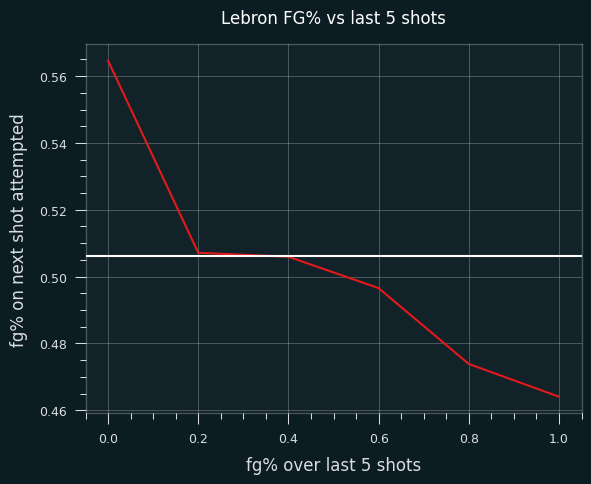

In [81]:
plt.plot(fgpct_by_last5)
plt.xlabel("fg% over last 5 shots")
plt.ylabel("fg% on next shot attempted")
plt.axhline(lbj_overall, color="white")
_out = plt.title("Lebron FG% vs last 5 shots")

lebron attempts around 20 shots a game. so the difference is around 4 points a game (if he only shot 2 pointers)

In [175]:
SHOTS_PER_GAME = 20
(fgpct_by_last5[0] - fgpct_by_last5[1.0]) * SHOTS_PER_GAME * 2

np.float64(4.022401538481528)

I wonder if his fg% changes by number of shots in the game.

In [82]:
pct_by_shot_seq = (lbj.groupby("shot_seq")["SHOT_MADE"].value_counts() / lbj.groupby("shot_seq")["shot_seq"].value_counts())[:,True]

In [83]:
pct_by_shot_seq[:25]

C:\Users\casey\AppData\Local\Temp\ipykernel_13172\792248947.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  pct_by_shot_seq[:25]


shot_seq
1.0     0.516756
2.0     0.524799
3.0     0.558981
4.0     0.540214
5.0     0.510054
6.0     0.537223
7.0     0.535570
8.0     0.512424
9.0     0.509434
10.0    0.518594
11.0    0.494198
12.0    0.490605
13.0    0.503587
14.0    0.504451
15.0    0.501949
16.0    0.464286
17.0    0.472727
18.0    0.468150
19.0    0.490417
20.0    0.469038
21.0    0.475040
22.0    0.480315
23.0    0.482143
24.0    0.511864
25.0    0.456621
Name: count, dtype: float64

aren't really enough shots in the 25+ spots to get a good estimate

In [84]:
print("number of shots")
lbj.groupby("shot_seq")["shot_seq"].value_counts()[24:]

number of shots


C:\Users\casey\AppData\Local\Temp\ipykernel_13172\448824676.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  lbj.groupby("shot_seq")["shot_seq"].value_counts()[24:]


shot_seq
24.0    295
25.0    219
26.0    160
27.0    113
28.0     82
29.0     64
30.0     34
31.0     24
32.0     15
33.0     13
34.0      7
35.0      4
36.0      1
Name: count, dtype: int64

Lebron's FG% is all over the place over the course of the game.

I had heard rumors that nba players have a lower shooting percentage on their first attempt, but Lebron doesn't appear to.

C:\Users\casey\AppData\Local\Temp\ipykernel_13172\1158990149.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  plt.plot(pct_by_shot_seq[:20])


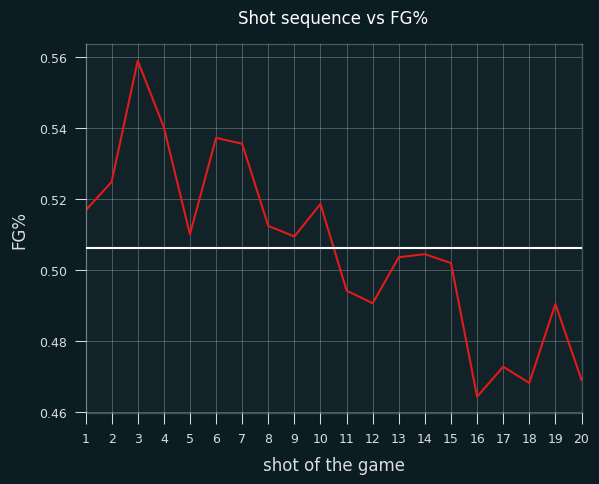

In [157]:
plt.plot(pct_by_shot_seq[:20])
plt.xlim(1,20)
plt.xticks(range(1,21))
plt.xlabel("shot of the game")
plt.minorticks_off()
plt.ylabel("FG%")
plt.axhline(lbj_overall, color="white")
_out = plt.title("Shot sequence vs FG%")

In [86]:
lbj.columns

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT',
       'SORTABLE_DATE', 'makes', 'misses', 'shot_seq', 'shoot_pct', 'last5'],
      dtype='object')

what about league wide shooting numbers?

In [87]:
# it's about 400MB as a 'feather' file.
# I don't think the data size is that crazy given that each season is 20MB or so, and there are 25 of them.
#test_shots.to_feather("casey.feather")

In [88]:
# the following code takes 2 minutes to run

# for key, shots in all_shots.groupby(["PLAYER_ID", "GAME_ID"]):
#     for key2, shot in shots.iterrows():
#         pass

the next line takes 26 minutes+ to run (season_streaks.add_sequence_data)

In [89]:
# aug = season_streaks.add_sequence_data(test_shots)
# aug.to_feather("streak-augment.feather")

aug = pd.read_feather("streak-augment.feather")

In [90]:
aug.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SORTABLE_DATE,makes_in_game,misses_in_game,shot_seq,shoot_pct,last_5
0,2004,2003-04,1610612748,Miami Heat,2548,Dwyane Wade,G,PG,10-28-2003,20300001,...,0,1,11,48,2003-10-28,0,0,1,0.0,NaN
1,2004,2003-04,1610612756,Phoenix Suns,2063,Jake Voskuhl,C,C,10-28-2003,20300002,...,2,1,11,42,2003-10-28,0,0,1,0.0,NaN
2,2004,2003-04,1610612747,Los Angeles Lakers,406,Shaquille O'Neal,C,C,10-28-2003,20300003,...,6,1,11,39,2003-10-28,0,0,1,0.0,NaN
3,2004,2003-04,1610612759,San Antonio Spurs,1938,Manu Ginobili,G,SG,10-28-2003,20300002,...,25,1,11,24,2003-10-28,0,0,1,0.0,NaN
4,2004,2003-04,1610612755,Philadelphia 76ers,2422,John Salmons,G,SG,10-28-2003,20300001,...,23,1,11,21,2003-10-28,0,0,1,0.0,NaN


In [91]:
league_last_5 = (aug.groupby("last_5")["SHOT_MADE"].value_counts() / aug.groupby("last_5")["last_5"].value_counts())[:,True]
league_last_5

last_5
0.0    0.455392
0.2    0.453953
0.4    0.455651
0.6    0.456381
0.8    0.459470
1.0    0.470600
Name: count, dtype: float64

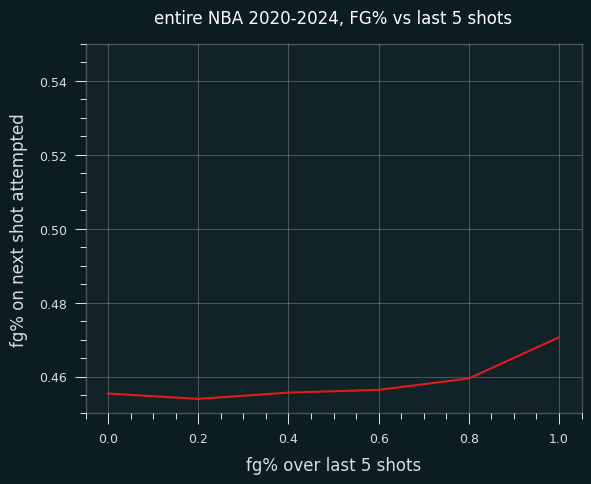

In [ ]:
plt.plot(league_last_5)
plt.xlabel("fg% over last 5 shots")
plt.ylabel("fg% on next shot attempted")
plt.ylim(.45, .55)
#plt.axhline(lbj_overall, color="white")
_out = plt.title("entire NBA 2020-2024, FG% vs last 5 shots")

In [92]:
league_shot_seq = (aug.groupby("shot_seq")["SHOT_MADE"].value_counts() / aug.groupby("shot_seq")["shot_seq"].value_counts())[:,True]

league_shot_seq[:20]

shot_seq
1     0.445438
2     0.461977
3     0.464622
4     0.463450
5     0.461921
6     0.462538
7     0.461432
8     0.458985
9     0.457061
10    0.457395
11    0.456787
12    0.456012
13    0.453251
14    0.453209
15    0.451998
16    0.449106
17    0.444152
18    0.444955
19    0.451342
20    0.440855
Name: count, dtype: float64

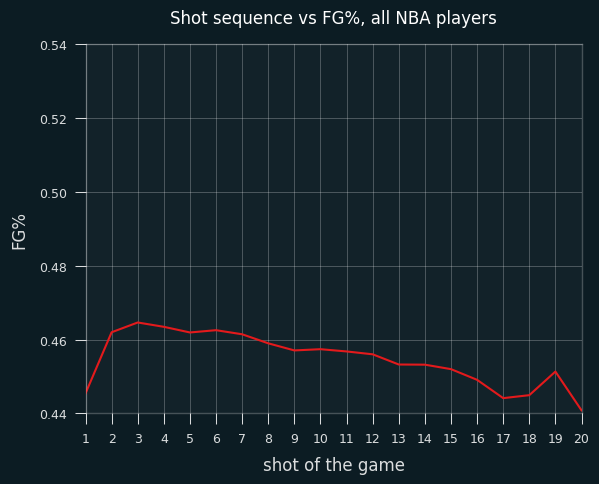

In [163]:
plt.plot(league_shot_seq[:20])
plt.xlim(1,20)
plt.ylim(.44, .54)
plt.xticks(range(1,21))
plt.xlabel("shot of the game")
plt.minorticks_off()
plt.ylabel("FG%")
#plt.axhline(lbj_overall, color="white")
_out = plt.title("Shot sequence vs FG%, all NBA players")

what about high volume scorers? previously they have shown more of an un-streaky tendency than low volume scorers. however, their field goal %age doesn't seem to change the way LeBron does based on last 5 shots.

In [219]:
highvol_players = all_players[all_players.makes > 2000]


In [220]:
len(highvol_players)

321

In [216]:
highvol_shots = aug[aug.PLAYER_ID.isin(highvol_players.player_id)]

In [217]:
len(highvol_shots)

819695

In [218]:
highvol_last_5 = (highvol_shots.groupby("last_5")["SHOT_MADE"].value_counts() / highvol_shots.groupby("last_5")["last_5"].value_counts())[:,True]
highvol_last_5

last_5
0.0    0.473588
0.2    0.468811
0.4    0.465078
0.6    0.457707
0.8    0.453243
1.0    0.448923
Name: count, dtype: float64

,player_id,player_name,makes,misses,total_streaks,raw_data,expected_streaks,variance,sd,z_score,ww_percentile
3,57,Doug Christie,461,602,561,LLLLWLWLWWWLWLLLWWWLLWLLWLWLWLWWLWLWWWWLWLLLWL...,523.148636,256.230743,16.007209,2.364645,99.097632
54,399,Sean Rooks,54,97,82,LLLLLLLWWLLWLWWLLLWWLLWLLLWLWWLLLWWLWLLLLWLWLW...,70.377483,31.625718,5.623675,2.066712,98.061935
82,708,Kevin Garnett,5681,5550,5733,WLLLWLWLLLWLLWWWLWWWLLWLLWWWWLWWLLWLWLWLWLLLWL...,5615.735999,2806.736028,52.978637,2.213420,98.656567
121,959,Steve Nash,4263,4199,4327,LWLWWLWLLLLLWLLWLWLWLWLLWLLWLWLWLWLLWLWLLWLLWL...,4231.757977,2115.007954,45.989216,2.070964,98.081893
149,1495,Tim Duncan,6353,6266,6432,WWLWLWWWLWLWLWWLLLLWWLWLLLLLLLWLLWLLLWLWWLWWWW...,6310.200095,3154.200082,56.162266,2.168714,98.494781
...,...,...,...,...,...,...,...,...,...,...,...
2070,1631219,John Butler Jr.,17,36,31,LLLLWLLLWLLLWWLWLWLLLWLWLWLLLWLWLLWLWLWWLLLLWL...,24.094340,9.812580,3.132504,2.204518,98.625602
2075,1631230,Dominick Barlow,102,97,115,LLWWLWLLWWLWLWWLWLWWLWLLLWWLWLWWLWLWWLWWWLWLLL...,100.437186,49.435943,7.031070,2.071209,98.083036
2102,1641706,Brandon Miller,476,607,577,LWLWLLWLLLLLLWWLLLLLWWLLWLWWLLWLLLWLWWWLLWLLWL...,534.577101,262.634885,16.206014,2.617726,99.557410
2146,1641787,Tosan Evbuomwan,36,35,46,LLLLLWLWLWLWLWWWLWLWWLWLLLWLWWLWLLWLLWLWWLLWLL...,36.492958,17.489387,4.182031,2.273307,98.849616


how about players with higher z scores (minus LeBron)? do they show the same tendency based on the `last_5` attribute? if the unstreakiness is due to chance, I don't think we'd see a trend there.

In [222]:

high_z_players = all_players[(all_players.z_score > 2) & (all_players.player_id != 2544)] # excluding LeBron!

highvol_shots = aug[aug.PLAYER_ID.isin(high_z_players.player_id)]

highvol_last_5 = (highvol_shots.groupby("last_5")["SHOT_MADE"].value_counts() / highvol_shots.groupby("last_5")["last_5"].value_counts())[:,True]
highvol_last_5

last_5
0.0    0.470880
0.2    0.467407
0.4    0.463327
0.6    0.455751
0.8    0.452037
1.0    0.447944
Name: count, dtype: float64

In [227]:
highvol_fg_pct = (highvol_shots.SHOT_MADE.value_counts() / len(highvol_shots))[True]

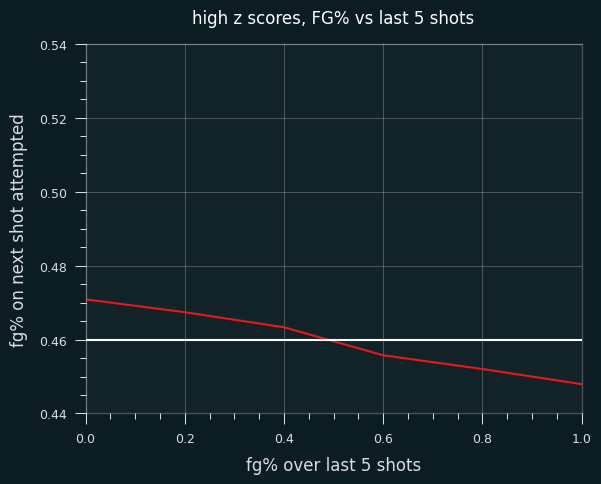

In [229]:
plt.plot(highvol_last_5)
plt.xlabel("fg% over last 5 shots")
plt.ylabel("fg% on next shot attempted")
plt.axhline(highvol_fg_pct, color="white")
plt.ylim(.44, .54)
plt.xlim(0,1)
#plt.axhline(lbj_overall, color="white")
_out = plt.title("high z scores, FG% vs last 5 shots")